# 01 Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
# Create path
path = r'/Users/dana/Documents/Instacart Basket Analysis/'

In [3]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# 03 Task

### Consider PII

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_spent', 'spender_flag', 'order_frequency', 'order_freqency_flag',
       'age', 'number_of_dependents', 'family_status', 'income', 'state'],
      dtype='object')

In [5]:
# the first name and last name data would have been PII but I already removed that.

### Compare customer behavior in different geographic regions

In [6]:
# check columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_spent', 'spender_flag', 'order_frequency', 'order_freqency_flag',
       'age', 'number_of_dependents', 'family_status', 'income', 'state'],
      dtype='object')

In [7]:
# check value counts
df['state'].value_counts()

Pennsylvania            667738
California              660428
Rhode Island            657662
Georgia                 657092
New Mexico              655188
Arizona                 654553
North Carolina          652329
Oklahoma                652275
Alaska                  649026
Minnesota               648424
Massachusetts           647020
Wyoming                 644927
Virginia                642103
Missouri                641323
Texas                   641051
Colorado                639820
Maine                   639175
North Dakota            638997
Alabama                 638650
Louisiana               638179
Kansas                  638021
Delaware                637477
South Carolina          637423
Oregon                  636966
Arkansas                636737
New York                636707
Nevada                  636697
Montana                 635838
South Dakota            634362
Illinois                633476
Hawaii                  633446
Washington              633445
Mississi

#### Create a region column using region subsets

In [8]:
result = []

for value in df['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont','Massachusetts', 
            'Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
    result.append('northeast')
  elif value in ['Wisconsin', 'Michigan', 'Illinois','Indiana','Ohio','North Dakota',
                'South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
    result.append('midwest')
  elif value in ['Delaware', 'Maryland', 'District of Columbia','Virginia', 
                'West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky',
                'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
    result.append('south')
  elif value in ['Idaho', 'Montana', 'Wyoming','Nevada','Utah','Colorado','Arizona',
                            'New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
    result.append('west')

In [9]:
# create new column for result
df['region'] = result

In [10]:
# check results
df[['state','region']].sample(10)

,state,region
8038383,Missouri,midwest
1154980,Alaska,west
30996831,New Hampshire,northeast
3871589,Hawaii,west
10241770,Indiana,midwest
18132942,Maine,northeast
29176605,Indiana,midwest
26561847,Tennessee,south
26479444,Pennsylvania,northeast
11287524,Delaware,south


In [11]:
# check for missing
df['region'].isnull().sum()

0

In [12]:
df.shape

(32435059, 26)

In [13]:
# create a crosstab for spender_flag and region
crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [14]:
crosstab

spender_flag,High spender,Low spender
region,,
midwest,1269,47412
northeast,915,35138
south,1787,66232
west,1386,52070


In [15]:
# normalize rows to show differences in percentage
crosstab2 = pd.crosstab(df['region'], df['spender_flag'],normalize = 'index', dropna = False)
crosstab2

spender_flag,High spender,Low spender
region,,
midwest,0.026068,0.973932
northeast,0.025379,0.974621
south,0.026272,0.973728
west,0.025928,0.974072


In [16]:
# there isn't a significant difference between regions because each is the same percent compared to total

### Exclude low activity customers

In [20]:
# create flag for low activity
df.loc[df['max_order'] < 5, 'activity'] = 'Low activity'
df.loc[df['max_order'] >= 5, 'activity'] = 'Regular activity'

In [21]:
# create dataframe excluding low activity
df_active = df[df['activity'] == 'Regular activity']

In [22]:
# compare shape
df_active.shape

(30993489, 27)

In [23]:
df.shape

(32435059, 27)

In [24]:
# export 
df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_active.pkl'))

## Create a customer profiling variable

In [25]:
# create some customer profiles 

In [26]:
df_active.loc[(df_active['age'] <60) & (df_active['income'] <= 500000) & (df_active['income'] > 50000) & 
              (df_active['number_of_dependents'] >= 1), 'customer_profile']  = 'young middle-class parents'
df_active.loc[(df_active['age'] <60) & (df_active['income'] < 50000) & 
              (df_active['number_of_dependents'] >= 1), 'customer_profile']  = 'young lower-class parents'
df_active.loc[(df_active['age'] >=60) & (df_active['income'] <= 500000) & (df_active['income'] > 50000),
             'customer_profile']  = 'older middle-class'
df_active.loc[(df_active['age'] >=60) & (df_active['income'] < 50000),
             'customer_profile']  = 'older lower-class'
df_active.loc[(df_active['age'] <60) & (df_active['income'] <= 500000) & (df_active['income'] > 50000) & 
              (df_active['number_of_dependents'] < 1), 'customer_profile']  = 'young middle-class not parents'
df_active.loc[(df_active['age'] <60) & (df_active['income'] < 50000) & 
              (df_active['number_of_dependents'] < 1), 'customer_profile']  = 'young lower-class not parents'

/var/folders/xl/7_yccdl123jf248d4rbf8h1m0000gn/T/ipykernel_51040/1050002479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[(df_active['age'] <60) & (df_active['income'] <= 500000) & (df_active['income'] > 50000) &


In [27]:
# check values
df_active['customer_profile'].value_counts(dropna = False)

young middle-class parents        13448054
older middle-class                 9700685
young middle-class not parents     4459461
young lower-class parents          1855394
older lower-class                   873932
young lower-class not parents       636893
NaN                                  19070
Name: customer_profile, dtype: int64

### Create visualizations

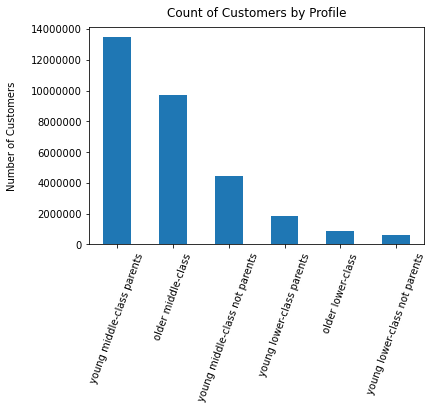

In [28]:
# create a bar chart for customer profiles
bar1 = df_active['customer_profile'].value_counts().plot.bar(rot=70)
plt.ylabel("Number of Customers", labelpad=14)
plt.title("Count of Customers by Profile", y = 1.02)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [30]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profiles.png'))

In [31]:
# find aggregate values for order frequency by customer profile
df_active.groupby('customer_profile').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                                          mean  min   max
customer_profile                                         
older lower-class                    15.063254  0.0  30.0
older middle-class                   15.102705  0.0  30.0
young lower-class not parents        15.173864  0.0  30.0
young lower-class parents            15.018747  0.0  30.0
young middle-class not parents       15.059122  0.0  30.0
young middle-class parents           15.106802  0.0  30.0

In [33]:
df_active.loc[df_active['prices'] >100, 'prices'] = np.nan

In [34]:
# find aggregate values for prices by customer profile
df_active.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                                    mean  min   max
customer_profile                                   
older lower-class               6.511949  1.0  25.0
older middle-class              7.911247  1.0  25.0
young lower-class not parents   6.780190  1.0  25.0
young lower-class parents       6.774377  1.0  25.0
young middle-class not parents  7.926820  1.0  25.0
young middle-class parents      7.929619  1.0  25.0

In [35]:
# create crosstab for customer profiles by region
crosstab2 = pd.crosstab(df_active['customer_profile'], df_active['region'], dropna = False)

In [36]:
crosstab2

region,midwest,northeast,south,west
customer_profile,,,,
older lower-class,196858,158698,299519,218857
older middle-class,2256177,1725634,3222753,2496121
young lower-class not parents,144311,116476,216849,159257
young lower-class parents,443362,312675,627556,471801
young middle-class not parents,1061709,758981,1489079,1149692
young middle-class parents,3157860,2394292,4460705,3435197


In [37]:
# create crosstab for customer profiles by department_id
crosstab3 = pd.crosstab(df_active['customer_profile'], df_active['department_id'], dropna = False)

In [38]:
crosstab3

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
customer_profile,,,,,,,,,,,,,,,,,,,,,
older lower-class,55793,924,26518,208564,4766,4986,107798,1977,15258,1244,...,6977,42203,25078,19068,127713,23518,6442,153388,26769,1565
older middle-class,672484,10666,355471,2893619,42688,81344,774975,29749,264472,10179,...,225561,567224,202433,324892,1633284,216646,132224,786379,316345,20217
young lower-class not parents,40292,903,20118,158068,3308,4414,69863,1745,12736,823,...,6990,31631,16806,15450,97490,15810,5891,102579,20750,1308
young lower-class parents,119092,2059,60121,459682,9973,12236,205460,4890,36487,2609,...,20311,92227,49524,44457,277160,47888,16907,303562,58929,3674
young middle-class not parents,304960,4968,165418,1339458,21515,38194,354425,13740,121211,4501,...,101207,260180,92989,151216,753728,97028,62948,351495,145826,9559
young middle-class parents,927901,14875,492383,4015642,61769,114630,1057657,40807,371357,14092,...,313351,788152,283603,456222,2284411,298037,185703,1067500,434815,28436


In [39]:
# copy to excel so I can see it all
crosstab3.to_clipboard()

Text(0, 0.5, 'Items')

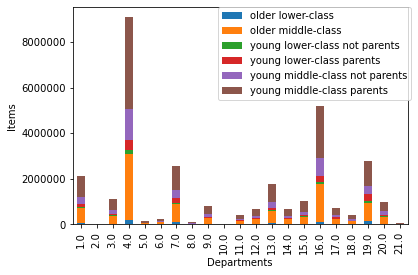

In [52]:
# create a stacked bar chart
df2 = df_active.groupby(['customer_profile', 'department_id'])['department_id'].count().unstack('customer_profile').fillna(0)
bar2 = df2.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Departments')
plt.ylabel('Items')

In [53]:
# save as image
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_departments.png'))

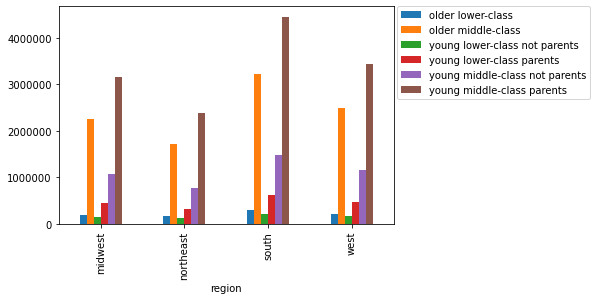

In [48]:
# create bar chart to show regions
df3 = df_active.groupby(['customer_profile', 'region'])['region'].count().unstack('customer_profile').fillna(0)
bar3 = df3.plot(kind='bar', stacked=False)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.ticklabel_format(style='plain', axis='y')

Text(0.5, 0, 'Prices')

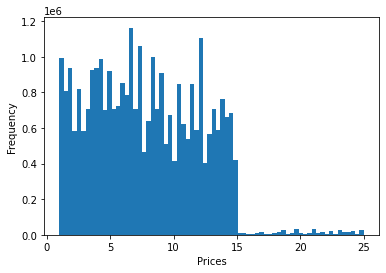

In [50]:
hist = df_active['prices'].plot.hist(bins = 70)
plt.xlabel('Prices')

In [51]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 04 Export

In [ ]:
# export 
df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_active.pkl'))